In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('hospitalData.csv')

In [3]:
df.head()

,Unnamed: 0,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,...,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent
0,0,010001,3.0,14.5,4.5,8.9,12.5,16.2,13.7,0.65,...,83.0,86.0,84.0,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,506.0,21.0
1,1,010005,3.0,15.5,NaN,10.9,15.3,20.8,15.7,1.10,...,88.0,85.0,88.0,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957.0,1135.0,34.0
2,2,010006,3.6,14.9,3.2,8.8,13.2,17.2,17.2,1.28,...,84.0,82.0,84.0,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631.0,579.0,22.0
3,3,010007,2.8,NaN,NaN,8.3,13.3,21.6,15.9,1.30,...,85.0,86.0,85.0,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467.0,185.0,27.0
4,4,010008,NaN,NaN,NaN,8.0,12.9,15.7,NaN,NaN,...,NaN,NaN,NaN,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049.0,63.0,31.0


In [51]:
df.shape

(4944, 39)

In [4]:
df.loc[df['H_RECMND_LINEAR_SCORE'] < 81, 'STAR_RATING'] = 1
df.loc[(df['H_RECMND_LINEAR_SCORE'] >= 81) & (df['H_RECMND_LINEAR_SCORE'] < 86), 'STAR_RATING'] = 2
df.loc[(df['H_RECMND_LINEAR_SCORE'] >= 86) & (df['H_RECMND_LINEAR_SCORE'] < 91), 'STAR_RATING'] = 3
df.loc[(df['H_RECMND_LINEAR_SCORE'] >= 91) & (df['H_RECMND_LINEAR_SCORE'] < 95), 'STAR_RATING'] = 4
df.loc[df['H_RECMND_LINEAR_SCORE'] >= 95, 'STAR_RATING'] = 5

In [5]:
df.head()

,Unnamed: 0,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,...,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,010001,3.0,14.5,4.5,8.9,12.5,16.2,13.7,0.65,...,86.0,84.0,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,506.0,21.0,2.0
1,1,010005,3.0,15.5,NaN,10.9,15.3,20.8,15.7,1.10,...,85.0,88.0,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957.0,1135.0,34.0,3.0
2,2,010006,3.6,14.9,3.2,8.8,13.2,17.2,17.2,1.28,...,82.0,84.0,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631.0,579.0,22.0,2.0
3,3,010007,2.8,NaN,NaN,8.3,13.3,21.6,15.9,1.30,...,86.0,85.0,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467.0,185.0,27.0,2.0
4,4,010008,NaN,NaN,NaN,8.0,12.9,15.7,NaN,NaN,...,NaN,NaN,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049.0,63.0,31.0,NaN


In [6]:
c = df['STAR_RATING'].value_counts(dropna=True)
p = df['STAR_RATING'].value_counts(dropna=True, normalize=True)
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
3.0,1612,0.456787
4.0,890,0.252196
2.0,683,0.193539
1.0,180,0.051006
5.0,164,0.046472


In [7]:
df_clean = df.dropna()

In [8]:
df_clean.head()

,Unnamed: 0,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,...,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,010001,3.0,14.5,4.5,8.9,12.5,16.2,13.7,0.65,...,86.0,84.0,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,506.0,21.0,2.0
2,2,010006,3.6,14.9,3.2,8.8,13.2,17.2,17.2,1.28,...,82.0,84.0,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631.0,579.0,22.0,2.0
5,5,010011,2.6,14.1,3.7,8.9,13.1,16.1,12.4,1.74,...,81.0,86.0,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235.0,2193.0,33.0,3.0
7,7,010016,2.2,16.0,3.3,7.1,13.2,16.4,13.9,2.11,...,84.0,88.0,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007.0,1103.0,21.0,3.0
12,12,010023,2.5,13.1,5.9,10.8,12.7,18.5,14.7,0.89,...,84.0,86.0,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116.0,702.0,24.0,3.0


In [9]:
c = df_clean['STAR_RATING'].value_counts(dropna=False)
p = df_clean['STAR_RATING'].value_counts(dropna=False, normalize=True)
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
3.0,489,0.519108
4.0,277,0.294055
2.0,145,0.153928
1.0,22,0.023355
5.0,9,0.009554


In [50]:
df_clean.shape

(942, 41)

In [10]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_clean['STATE_CODE'] = lb_make.fit_transform(df_clean['State'])
df_clean['CITY_CODE'] = lb_make.fit_transform(df_clean['City'])

df_clean.head() #Results in appending a new column to df

/Users/zainiqbal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/zainiqbal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Unnamed: 0,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,...,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING,STATE_CODE,CITY_CODE
0,0,010001,3.0,14.5,4.5,8.9,12.5,16.2,13.7,0.65,...,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,506.0,21.0,2.0,1,141
2,2,010006,3.6,14.9,3.2,8.8,13.2,17.2,17.2,1.28,...,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631.0,579.0,22.0,2.0,1,184
5,5,010011,2.6,14.1,3.7,8.9,13.1,16.1,12.4,1.74,...,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235.0,2193.0,33.0,3.0,1,52
7,7,010016,2.2,16.0,3.3,7.1,13.2,16.4,13.9,2.11,...,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007.0,1103.0,21.0,3.0,1,4
12,12,010023,2.5,13.1,5.9,10.8,12.7,18.5,14.7,0.89,...,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116.0,702.0,24.0,3.0,1,358


# Model Selection

In [43]:
y=df_clean['STAR_RATING']
cols=["COMP_HIP_KNEE","MORT_30_AMI","MORT_30_CABG","MORT_30_COPD","MORT_30_HF","MORT_30_PN","MORT_30_STK",
      "PSI_10_POST_KIDNEY","PSI_11_POST_RESP","PSI_12_POSTOP_PULMEMB_DVT","PSI_13_POST_SEPSIS","PSI_14_POSTOP_DEHIS",
      "PSI_15_ACC_LAC","PSI_3_ULCER","PSI_4_SURG_COMP","PSI_6_IAT_PTX","PSI_8_POST_HIP","PSI_90_SAFETY",
      "PSI_9_POST_HEM","H_CLEAN_LINEAR_SCORE","H_COMP_1_LINEAR_SCORE","H_COMP_2_LINEAR_SCORE",
      "H_COMP_3_LINEAR_SCORE","H_COMP_5_LINEAR_SCORE","H_COMP_6_LINEAR_SCORE","H_COMP_7_LINEAR_SCORE"
      ,"H_HSP_RATING_LINEAR_SCORE","H_QUIET_LINEAR_SCORE"
      #,"ZIP Code"
      ,"STATE_CODE"
      #,"CITY_CODE"
     ]
x=df_clean[cols]

In [44]:
import sklearn.model_selection as cv

SEED = 1

(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.20, random_state = SEED)

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import svm
#from sklearn import xgb

# Instantiate individual classifiers
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)
rf = RandomForestClassifier(n_estimators=60, random_state=SEED)
lr = LogisticRegression(random_state=SEED)
knn = KNN()
svc = svm.SVC(kernel='linear', C=1,random_state=SEED)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=1,random_state=SEED)
poly_svc = svm.SVC(kernel='poly', degree=3, C=1,random_state=SEED)
#xgb = xgb.XGBClassifier(objective="binary:logistic",learning_rate=0.03,n_estimators=500, max_depth=1, subsample=0.4, random_state=SEED)

# Define a list called classifier that contains
# the tuples (classifier_name, classifier)
classifiers = [('Classification Tree', dt),
               ('Random Forest', rf),
               ('Logistic Regression', lr), 
               ('K Nearest Neighbours', knn),
               ('SVM Linear', svc),
               ('SVM RBF', rbf_svc)#,
               #('SVM Poly', poly_svc)#,
               #('XGBoost',xgb)
              ]

In [46]:
for clf_name, clf in classifiers:
#fit clf to the training set
    clf.fit(x_train, y_train)
# Predict the labels of the test set
    y_pred = clf.predict(x_test)

# Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Classification Tree : 0.762
Random Forest : 0.836
Logistic Regression : 0.661
K Nearest Neighbours : 0.667
SVM Linear : 0.783
SVM RBF : 0.513


# Cross Validation

In [47]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Instantiate a RandomForest
rf = RandomForestClassifier(n_estimators=60, random_state=SEED)

# Compute the array containing the 10-folds
scores = cross_val_score(rf, x_train, y_train, cv=10) 

scores

/Users/zainiqbal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


array([0.75641026, 0.76923077, 0.68831169, 0.88      , 0.81333333,
       0.85333333, 0.76      , 0.78378378, 0.83561644, 0.78082192])

# Feature Importance

In [48]:
model = rf.fit(x_train, y_train)

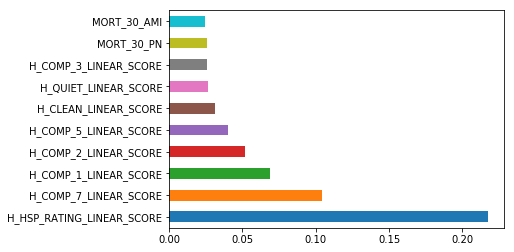

In [49]:
feat_importances = pd.Series(model.feature_importances_, index=cols)
feat_importances.nlargest(10).plot(kind='barh')